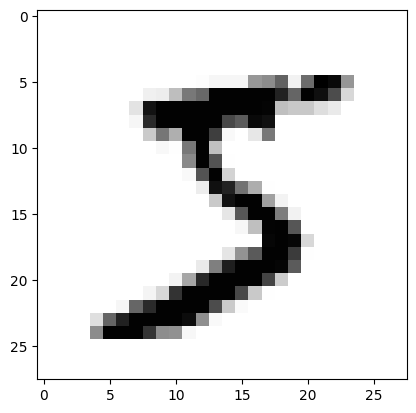

In [19]:
from tensorflow.keras.datasets import mnist 
import tensorflow as tf 
import numpy as np 
import sys 
from tensorflow.keras.utils import to_categorical



seed = 0

np.random.seed(seed)
tf.random.set_seed(3)

(x_train, y_train), (x_test, y_test ) = mnist.load_data()


import matplotlib.pyplot as plt 
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [15]:
import sys

for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d\t'%i)
    sys.stdout.write('\n')   

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [16]:
x_train.shape

(60000, 28, 28)

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Epoch 1: val_loss improved from inf to 0.14696, saving model to ./model\01-0.1470.hdf5

Epoch 2: val_loss improved from 0.14696 to 0.10216, saving model to ./model\02-0.1022.hdf5

Epoch 3: val_loss improved from 0.10216 to 0.08901, saving model to ./model\03-0.0890.hdf5

Epoch 4: val_loss improved from 0.08901 to 0.07547, saving model to ./model\04-0.0755.hdf5

Epoch 5: val_loss improved from 0.07547 to 0.07465, saving model to ./model\05-0.0747.hdf5

Epoch 6: val_loss improved from 0.07465 to 0.06398, saving model to ./model\06-0.0640.hdf5

Epoch 7: val_loss improved from 0.06398 to 0.06383, saving model to ./model\07-0.0638.hdf5

Epoch 8: val_loss improved from 0.06383 to 0.05865, saving model to ./model\08-0.0587.hdf5

Epoch 9: val_loss did not improve from 0.05865

Epoch 10: val_loss did not improve from 0.05865

Epoch 11: val_loss did not improve from 0.05865

Epoch 12: val_loss did not improve from 0.05865

Epoch 13: val_loss did not imp

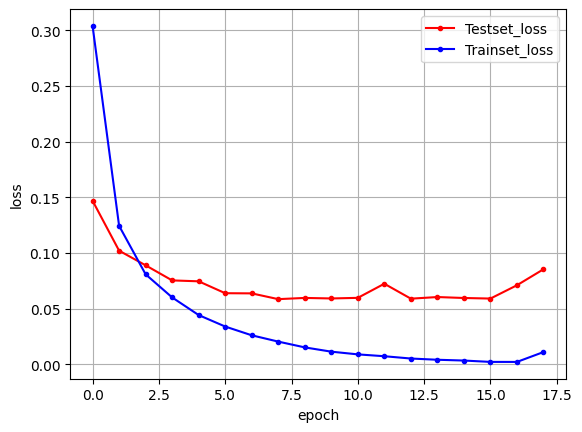

In [17]:
np.random.seed(seed)
tf.random.set_seed(3)
x_train = x_train.reshape(x_train.shape[0],784)

# x_train = x_train.reshape(x_train.shape[0], 784)
x_train = x_train.astype('float64')
x_train = x_train /255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float64') /255

print("class : %d" % (y_train[0]))

# OneHotEncoding
from keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train[0])

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

model = Sequential()
model.add(Dense(512,input_dim=784, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback =  EarlyStopping(monitor='val_loss',patience=10)

history = model.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy : %.4f" % (model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()